In [233]:
import numpy as np
from gurobipy import *
import matplotlib.pyplot as plt

### Q5

#### (c)

In [234]:

dataset = np.array([[0,0],[1,3],[2,7],[3,-1],[4,0],[5,5],[6,10]])

A = np.hstack((np.ones((dataset.shape[0],1)), np.array([dataset[:,0]]).T, np.array([dataset[:,0]]).T**2, np.array([dataset[:,0]]).T**3))
A

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

In [235]:
c = np.zeros((4,1))
c

array([[0.],
       [0.],
       [0.],
       [0.]])

In [236]:
Y = np.array([dataset[:,1]])
Y = Y.T
Y

array([[ 0],
       [ 3],
       [ 7],
       [-1],
       [ 0],
       [ 5],
       [10]])

In [237]:
def L_c(A,c,Y,lamda):
    return ((A@c - Y).T @ (A@c - Y) + (lamda*c).T @ (lamda*c))[0][0]

In [238]:
def dL_c(A,lamda,c,Y):
    return 2*A.T@A@c - 2*A.T@Y + 2*lamda*c

In [239]:
def d2L_c(A,lamda):
    return 2*A.T@A + 2*lamda*np.identity(A.shape[1])

In [240]:
### Exact Line Search with gradient descent
# min f(x - alpha*f'(x))
tolerance = 1e-15
c_els = []
for lamda in [0,1,10,1000]:
    c_copy= c.copy()
    iter = 0
    while(True):
        m = Model()
        m.Params.LogToConsole = 0
        alpha = m.addVar(lb = 0,name='alpha')
        c_new = c_copy - alpha*dL_c(A,lamda,c_copy,Y)
        m.setObjective(L_c(A,c_new,Y,lamda),GRB.MINIMIZE)
        m.optimize()
        iter += 1
        c_new = c_copy - alpha.x*dL_c(A,lamda,c_copy,Y)
        if(abs(L_c(A,c_new,Y,lamda) - L_c(A,c_copy,Y,lamda)) < tolerance):
            break
        c_copy = c_new
    print("For lamda:",lamda,"Iterations:",iter,"MinValue of L(c):",L_c(A,c_new,Y,lamda))
    c_els.append(c_new)
    print("Convergence at c:\n",c_new)


For lamda: 0 Iterations: 43817 MinValue of L(c): 25.214285714525417
Convergence at c:
 [[ 1.17913399e-05]
 [ 6.94045288e+00]
 [-3.35713399e+00]
 [ 4.16665767e-01]]
For lamda: 1 Iterations: 10934 MinValue of L(c): 44.58893532463462
Convergence at c:
 [[ 1.3471434 ]
 [ 2.14210532]
 [-1.31781676]
 [ 0.19990922]]
For lamda: 10 Iterations: 64 MinValue of L(c): 65.45901019181585
Convergence at c:
 [[ 0.05107771]
 [ 0.03473262]
 [-0.03522386]
 [ 0.04676978]]
For lamda: 1000 Iterations: 4 MinValue of L(c): 176.32991674604273
Convergence at c:
 [[2.24410475e-05]
 [9.25693208e-05]
 [4.74067128e-04]
 [2.63401795e-03]]


In [241]:
### NEWTON's METHOD
# x = x - f'x/f''x
tolerance = 0.01
c_newton = []
for l in [0,1,10,1000]:
    c_old = c.copy()
    iter = 0
    while(True):
        c_new = c_old - np.linalg.inv(d2L_c(A,l)) @ dL_c(A,l,c_old,Y) 
        iter +=1
        if(np.linalg.norm(c_new - c_old) < tolerance):
            break
        c_old = c_new
    print("For lamda:",l,"Iterations:",iter)
    print("Convergence at:\n",c_new)
    c_newton.append(c_new)

For lamda: 0 Iterations: 2
Convergence at:
 [[-2.54667539e-13]
 [ 6.94047619e+00]
 [-3.35714286e+00]
 [ 4.16666667e-01]]
For lamda: 1 Iterations: 2
Convergence at:
 [[ 1.34714193]
 [ 2.14210824]
 [-1.31781787]
 [ 0.19990934]]
For lamda: 10 Iterations: 2
Convergence at:
 [[ 0.45365251]
 [ 0.36843448]
 [-0.28653158]
 [ 0.0785151 ]]
For lamda: 1000 Iterations: 2
Convergence at:
 [[0.00569429]
 [0.00480263]
 [0.00237539]
 [0.04070031]]


In [307]:
plot_x = np.linspace(-2, 10, 1000)
def polynomial(c,x):
    sum = 0
    for i in range(c.shape[0]):
        sum += c[i] * x**i
    return sum

In [308]:
plot_y_all = []
for c_new in c_els:
    plot_y = []
    for i in plot_x:
        plot_y.append(polynomial(c_new,i))
    plot_y_all.append(plot_y)


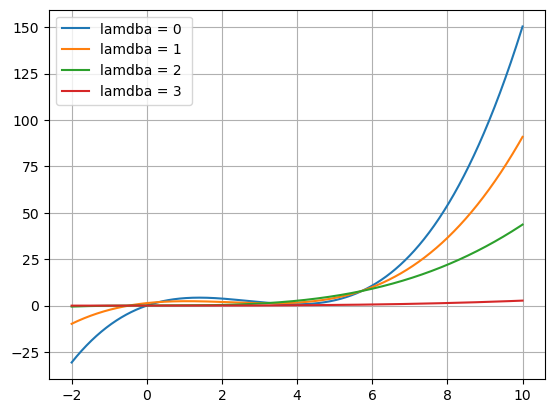

In [321]:
for plot_y in plot_y_all:
    plt.plot(plot_x,plot_y, label=f"lamdba = {plot_y_all.index(plot_y)} ")
plt.grid(True)
plt.legend()
plt.show()